#Data Preprocessing

Import libs


In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
USvideos_df = pd.read_csv('/content/USvideos.csv')

In [3]:
with open('/content/US_category_id.json', 'r') as file:
    US_category_id = json.load(file)

Since the information we need is under the "items" section, so we extract the data under "items" and flatten to display whole data

In [4]:
from pandas.io.json import json_normalize
items_data = US_category_id['items']
flattened_data = json_normalize(items_data, sep='_')
US_category_id_df = pd.DataFrame(flattened_data)

<ipython-input-4-6eb4413d7e3e>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  flattened_data = json_normalize(items_data, sep='_')


In [5]:
USvideos_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
US_category_id_df.head(5)

,kind,etag,id,snippet_channelId,snippet_title,snippet_assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


Check the information of two datasets

In [7]:
USvideos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [8]:
US_category_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   kind                32 non-null     object
 1   etag                32 non-null     object
 2   id                  32 non-null     object
 3   snippet_channelId   32 non-null     object
 4   snippet_title       32 non-null     object
 5   snippet_assignable  32 non-null     bool  
dtypes: bool(1), object(5)
memory usage: 1.4+ KB


Merge dataset

In [9]:
US_category_id_df['id'] = US_category_id_df['id'].astype(int)

In [10]:
combined_df = USvideos_df.merge(US_category_id_df, how = 'left', left_on = 'category_id', right_on = 'id')
combined_df['publish_time'] = pd.to_datetime(combined_df['publish_time'])
combined_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet_channelId,snippet_title,snippet_assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/G9LHzQmx44rX2S5ya...",23,UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  object             
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

Check which videos categorise are most popular, have most videos

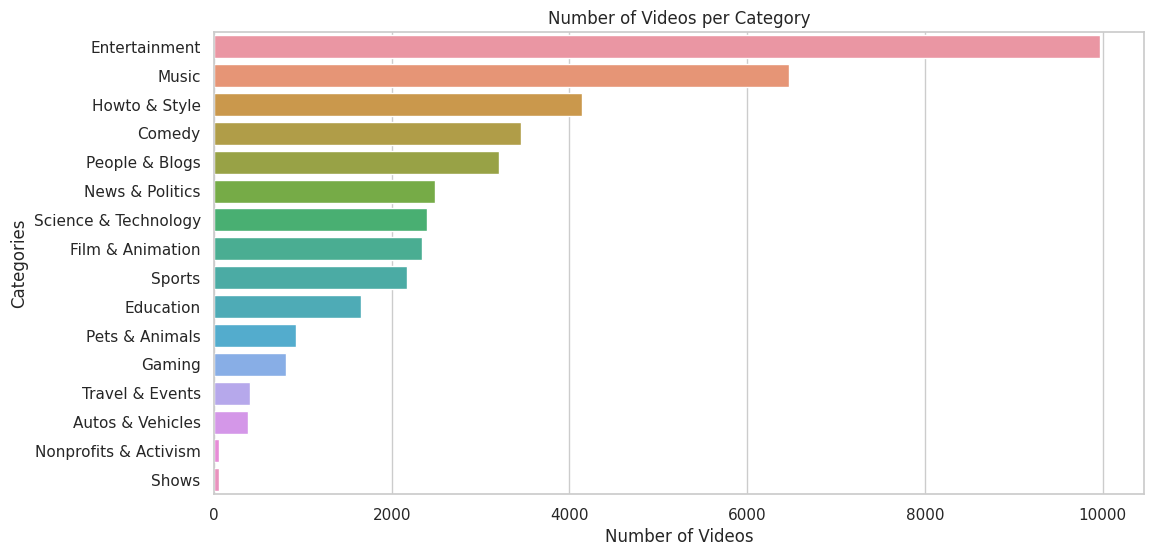

In [12]:
sns.set(style="whitegrid")
category_counts = combined_df['snippet_title'].value_counts()
plt.figure(figsize = (12, 6))
sns.barplot(x = category_counts.values, y = category_counts.index)
plt.title('Number of Videos per Category')
plt.xlabel('Number of Videos')
plt.ylabel('Categories')
plt.show()

So from this bar chart, we can see that entertainment and music categories dominate the platform

We want to know which categroies have most like/dislike/comments, in other words, have most active viewer.

In [13]:
# Calculate average views, likes, dislikes, and comments per category
engagement_metrics = combined_df.groupby('snippet_title').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

engagement_metrics.columns = ['Category', 'Average Views', 'Average Likes', 'Average Dislikes', 'Average Comments']
print(engagement_metrics)

                 Category  Average Views  Average Likes  Average Dislikes  \
0        Autos & Vehicles   1.355965e+06   11056.395833        632.838542   
1                  Comedy   1.480308e+06   62582.223315       2091.521840   
2               Education   7.129408e+05   29745.031401        816.408213   
3           Entertainment   2.067883e+06   53243.325070       4314.297772   
4        Film & Animation   3.106250e+06   70787.836247       2590.681450   
5                  Gaming   2.620831e+06   84502.183599      11241.696450   
6           Howto & Style   9.837301e+05   39286.076942       1320.284370   
7                   Music   6.201003e+06  218918.199011       7907.757726   
8         News & Politics   5.925877e+05    7298.364696       1680.759550   
9   Nonprofits & Activism   2.963884e+06  259923.614035      58076.859649   
10         People & Blogs   1.531835e+06   58135.825234       3173.800935   
11         Pets & Animals   8.311435e+05   21055.110870        573.238043   

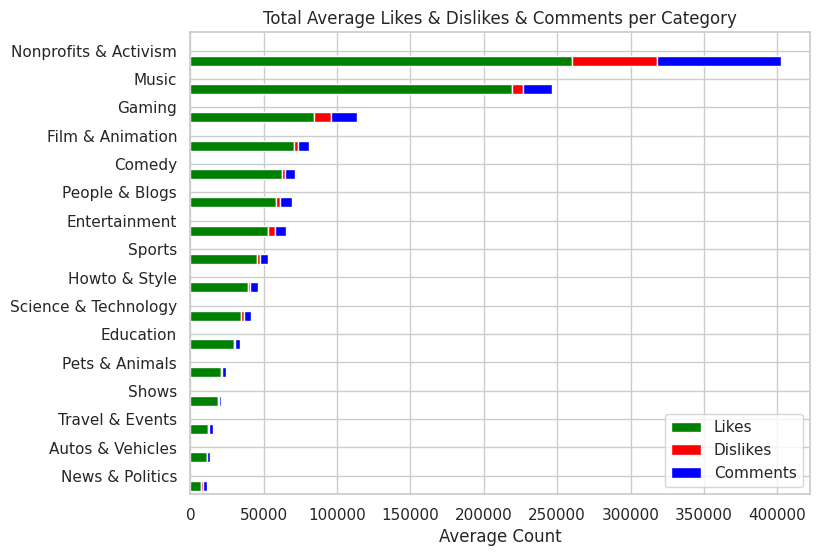

In [14]:
engagement_metrics['Total Average Likes & Dislikes'] = engagement_metrics['Average Likes'] + engagement_metrics['Average Dislikes']
engagement_metrics_sorted = engagement_metrics.sort_values(by='Total Average Likes & Dislikes', ascending=True)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ind = np.arange(len(engagement_metrics_sorted))
width = 0.35

p1 = ax.barh(ind, engagement_metrics_sorted['Average Likes'], width, label='Likes', color='green')
p2 = ax.barh(ind, engagement_metrics_sorted['Average Dislikes'], width, left=engagement_metrics_sorted['Average Likes'], label='Dislikes', color='red')
p3 = ax.barh(ind, engagement_metrics_sorted['Average Comments'], width, left=engagement_metrics_sorted['Average Likes'] + engagement_metrics_sorted['Average Dislikes'], label='Comments', color='blue')
ax.set(yticks=ind + width, yticklabels=engagement_metrics_sorted['Category'], ylim=[2*width - 1, len(engagement_metrics_sorted)])
ax.legend()

ax.set_xlabel('Average Count')
ax.set_title('Total Average Likes & Dislikes & Comments per Category')

plt.show()

Based on the plot above, we can see that 'Nonprofits & Activism' have the most active viewers, and 'Music' have the second highest number.

In [15]:
combined_df['publish_day'] = combined_df['publish_time'].dt.day_name()
combined_df['publish_hour'] = combined_df['publish_time'].dt.hour

In [16]:
publish_time_counts = combined_df.groupby(['publish_day', 'publish_hour']).size().reset_index(name='counts')

In [17]:
print(publish_time_counts['publish_hour'].unique())
print(publish_time_counts['publish_day'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


<ipython-input-18-c2a1766428ce>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = publish_time_counts.pivot('publish_day', 'publish_hour', 'counts')


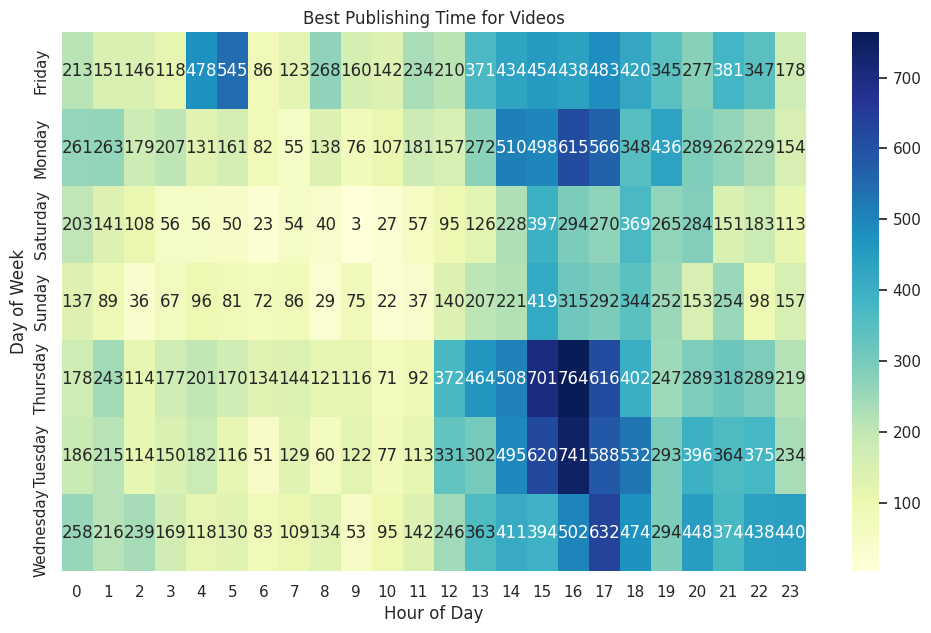

In [18]:
pivot_table = publish_time_counts.pivot('publish_day', 'publish_hour', 'counts')

plt.figure(figsize = (12, 7))
sns.heatmap(pivot_table, annot = True, fmt = "d", cmap="YlGnBu")
plt.title('Best Publishing Time for Videos')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

The heatmap indicates the frequency of video uploads by day of the week and hour of the day

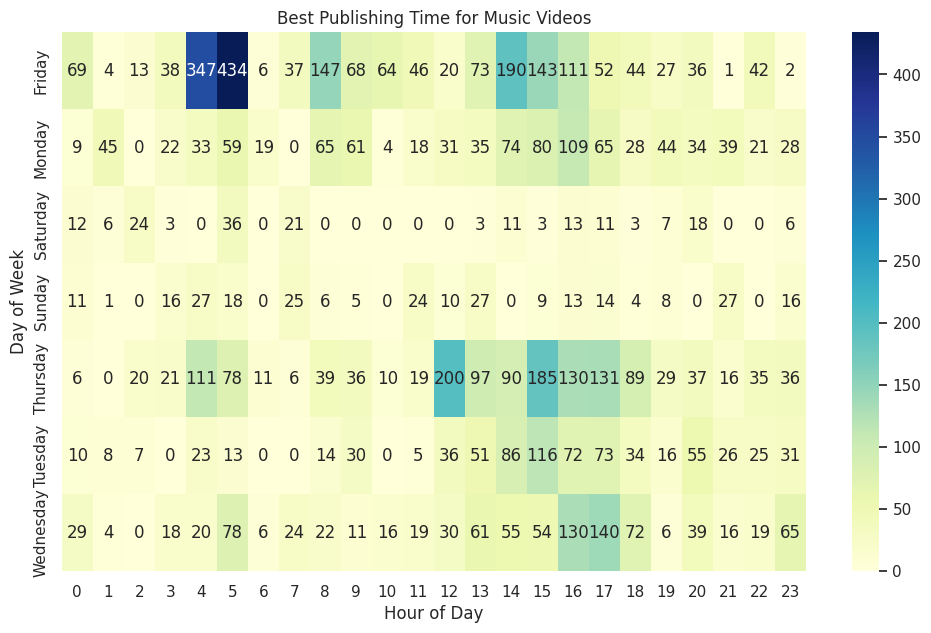

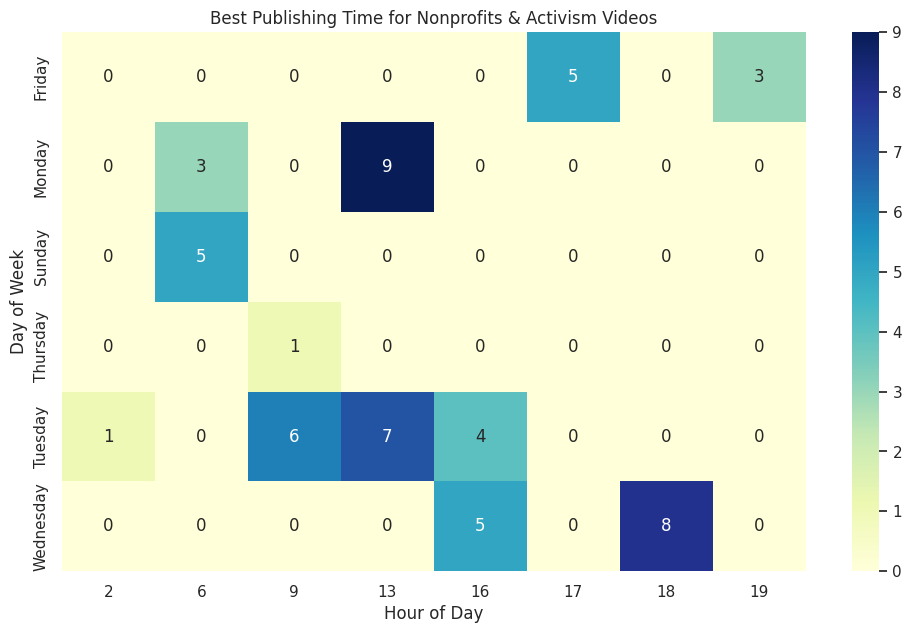

In [29]:
music_nonprofits_df = combined_df[combined_df['snippet_title'].isin(['Music', 'Nonprofits & Activism'])]

publish_time_counts_specific = music_nonprofits_df.groupby(['snippet_title', 'publish_day', 'publish_hour']).size().reset_index(name='counts')

pivot_table_music = publish_time_counts_specific[publish_time_counts_specific['snippet_title'] == 'Music'].pivot(index='publish_day', columns='publish_hour', values='counts')
pivot_table_nonprofits = publish_time_counts_specific[publish_time_counts_specific['snippet_title'] == 'Nonprofits & Activism'].pivot(index='publish_day', columns='publish_hour', values='counts')

pivot_table_music = pivot_table_music.fillna(0).astype(int)
pivot_table_nonprofits = pivot_table_nonprofits.fillna(0).astype(int)

plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table_music, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Best Publishing Time for Music Videos')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table_nonprofits, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Best Publishing Time for Nonprofits & Activism Videos')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


In [40]:
# Earliest trending date
earliest_time = combined_df['trending_date'].min()
print(f"Earliest trending_date in the dataset: {earliest_time}")

# Latest trending date
latest_time = combined_df['trending_date'].max()
print(f"Latest trending_date in the dataset: {latest_time}")

Earliest trending_date in the dataset: 2017-11-14 00:00:00
Latest trending_date in the dataset: 2018-06-14 00:00:00


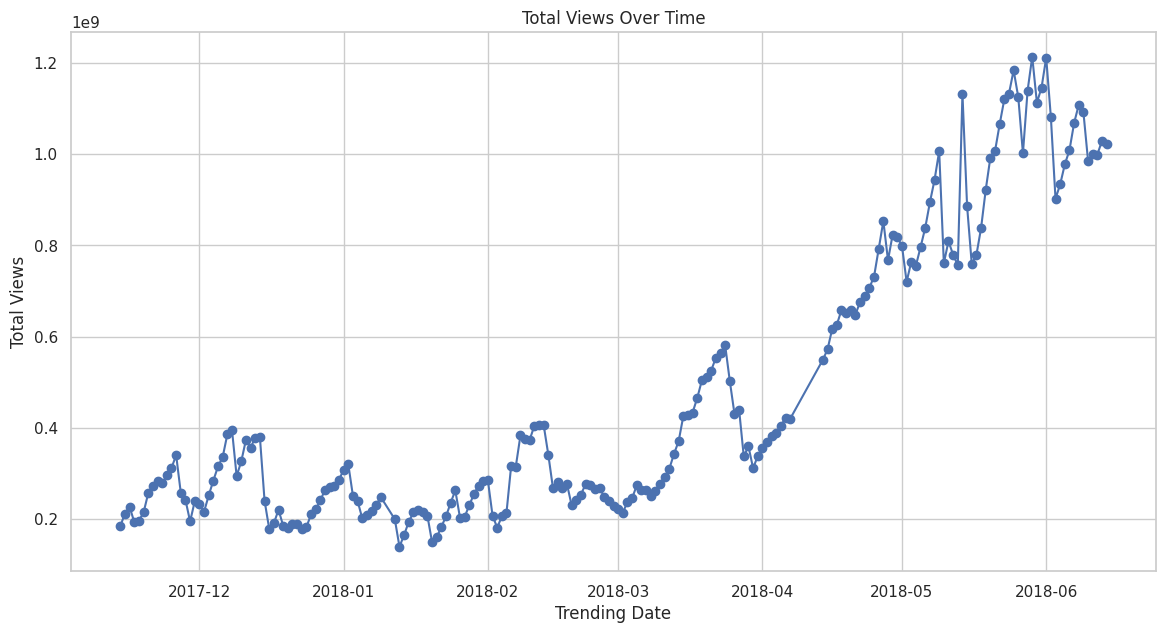

In [19]:
# Assuming 'trending_date' is the date when the video started trending
# Convert 'trending_date' to datetime if it's not already
combined_df['trending_date'] = pd.to_datetime(combined_df['trending_date'], format='%y.%d.%m')

# Aggregate views by trending date
views_over_time = combined_df.groupby('trending_date')['views'].sum().reset_index()

# Plotting the time series of views
plt.figure(figsize=(14, 7))
plt.plot(views_over_time['trending_date'], views_over_time['views'], marker='o')
plt.title('Total Views Over Time')
plt.xlabel('Trending Date')
plt.ylabel('Total Views')
plt.grid(True)
plt.show()


In [32]:
from scipy import stats

music_views = combined_df[combined_df['snippet_title'] == 'Music']['views']
nonprofits_views = combined_df[combined_df['snippet_title'] == 'Nonprofits & Activism']['views']

# T-test
t_stat, p_value = stats.ttest_ind(music_views, nonprofits_views, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 3.358391835387777, P-value: 0.0013581401916412373


In [34]:
correlation_matrix = combined_df[['views', 'likes', 'dislikes', 'comment_count']].corr()
correlation_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000
